# 2020年12月4日

Notes & Questions for CCTPY v0.1

B. Qin

## ---  Codes 杂项 ---

### 1. 运行环境要求

<div style="border:dotted grey;line-height:2em">
编写 cctpy 时，所用 python 版本和库：<br/>
python 3.8.0<br/>
numpy 1.16.6<br/>
matlib 3.3.3<br/>
</div>

### 2. Can't plot beamline \[demo codes in user manual\]

--> Solved: 

Add Plot2.show() @ Code END!

<div style="border:dotted grey;line-height:2em">
手册中绘图相关代码，需要在最后补上 Plot2.show() 或 Plot3.show()，分别绘制二维和三维图象
</div>

### 3. 无法分别显示2张或以上plot

<div style="border:dotted grey;line-height:2em">
cctpy 中的 Plot2/Plot3 只支持一次运行绘制一张图片，需要同时绘制多个图象时，需要自己编写 matpltlib 代码，下面给个出两个例子。
</div>

track 24 particles
当前使用单线程进行粒子跟踪，如果函数支持多线程并行，推荐使用多线程
运行一个粒子需要0.20249秒，估计总耗时4.85976秒
  4.17  8.33 12.50 16.67 20.83 25.00 29.17 33.33 37.50 41.67 45.83 50.00 54.17 58.33 62.50 66.67 70.83 75.00 79.17 83.33 87.50 91.67 95.83100.00%  finished
实际用时4.879993438720703


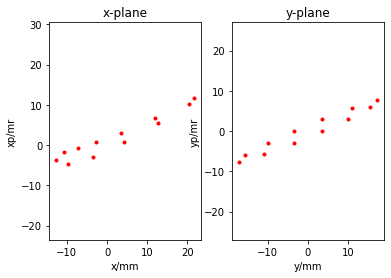

In [1]:
# 绘制 x 和 y 方向相椭圆
from cctpy import Beamline,P2,MM,BaseUtils
import matplotlib.pyplot as plt

bl = ( # QS 磁铁加前后 1m 漂移段
    Beamline.set_start_point(P2.origin())
      .first_drift(direct=P2.x_direct(),length=1.0)
      .append_qs(
          length=0.27,gradient=0,
          second_gradient=-1000,aperture_radius=60*MM
      ).append_drift(1.0)
)

x,y = bl.track_phase_ellipse(
    x_sigma_mm=3.5,xp_sigma_mrad=7.5,
    y_sigma_mm=3.5,yp_sigma_mrad=7.5,
    delta=0.0,kinetic_MeV=250,
    particle_number=12,footstep=1*MM
)

plt.subplot(121)
plt.plot(*P2.extract(x),'r.')
plt.xlabel(xlabel='x/mm')
plt.ylabel(ylabel='xp/mr')
plt.title(label='x-plane')
plt.axis("equal")

plt.subplot(122)
plt.plot(*P2.extract(y),'r.')
plt.xlabel(xlabel='y/mm')
plt.ylabel(ylabel='yp/mr')
plt.title(label='y-plane')
plt.axis("equal")

plt.show()

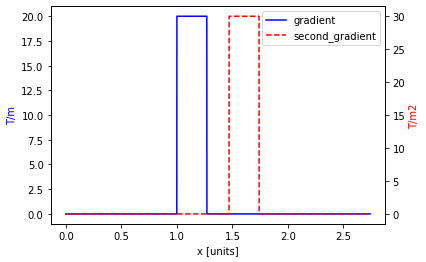

In [2]:
# 绘制双 y 轴图象
from cctpy import Beamline,P2,MM,BaseUtils
import matplotlib.pyplot as plt

bl = ( # 前后 1m 漂移段，中间一个四级铁一个六极铁
    Beamline.set_start_point(P2.origin())
      .first_drift(direct=P2.x_direct(),length=1.0)
      .append_qs(
          length=0.27,gradient=20,
          second_gradient=0,aperture_radius=60*MM
      ).append_drift(0.2)
      .append_qs(
          length=0.27,gradient=0,
          second_gradient=60,aperture_radius=60*MM
      ).append_drift(1.0)
)

gradient = bl.graident_field_along()
second_gradient = bl.second_graident_field_along()

fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(*P2.extract(gradient), 'b-', label = 'gradient')
ax2 = ax.twinx()
ax2.plot(*P2.extract(second_gradient), 'r--', label = 'second_gradient')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.set_xlabel("x [units]")
ax.set_ylabel("T/m",color='b')
ax2.set_ylabel("T/m2",color='r')

plt.show()

### 4. Plot无axis & unit

<div style="border:dotted grey;line-height:2em">
Plot2.info() 可以对标记 lable 和 title
<br>
另外新增了 Plot2.legend() 可以显示图例
</div>

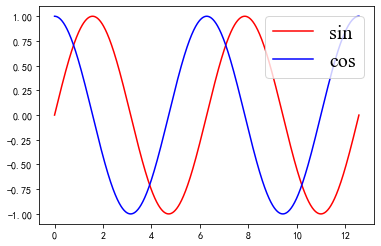

In [3]:
# Plot2.legend()
from cctpy import Plot2
import numpy as np

x = np.linspace(0,4*np.pi,1000)
y1 = np.sin(x)
y2 = np.cos(x)

Plot2.plot_xy_array(x,y1,describe='r-')
Plot2.plot_xy_array(x,y2,describe='b-')

Plot2.legend('sin','cos',font_size=20)

### 5. 磁场计算或束流跟踪耗时相对长，可增加简易进度条；以及时间花费统计。

<div style="border:dotted grey;line-height:2em">
Beamline.track_phase_ellipse() 函数已添加时间估计、统计、进度分析
<br>
另外代码中加入了多进程计算（python多线程支持不好，所以使用多进程）
<br>
要使用多进程计算功能：
<br>
1. 在使用CPU并行计算前，应确保你的脚本写在if __name__ == '__main__':代码块内部，并显式调用BaseUtils.i_am_sure_my_code_closed_in_if_name_equal_main()函数
<br>
2. Beamline.track_phase_ellipse() 函数中设定大于 1 的并发度。如 concurrency_level=4
</div>

处理并行任务，任务数目80，并行等级4
任务完成，用时6.561632871627808秒


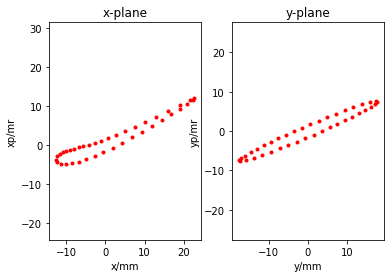

In [2]:
# 绘制 x 和 y 方向相椭圆
from cctpy import Beamline,P2,MM,BaseUtils
import matplotlib.pyplot as plt

if __name__ == '__main__':
    BaseUtils.i_am_sure_my_code_closed_in_if_name_equal_main()

    bl = ( # QS 磁铁加前后 1m 漂移段
        Beamline.set_start_point(P2.origin())
        .first_drift(direct=P2.x_direct(),length=1.0)
        .append_qs(
            length=0.27,gradient=0,
            second_gradient=-1000,aperture_radius=60*MM
        ).append_drift(1.0)
    )

    x,y = bl.track_phase_ellipse(
        x_sigma_mm=3.5,xp_sigma_mrad=7.5,
        y_sigma_mm=3.5,yp_sigma_mrad=7.5,
        delta=0.0,kinetic_MeV=250,
        particle_number=40,footstep=1*MM,
        concurrency_level=4
    )

    plt.subplot(121)
    plt.plot(*P2.extract(x),'r.')
    plt.xlabel(xlabel='x/mm')
    plt.ylabel(ylabel='xp/mr')
    plt.title(label='x-plane')
    plt.axis("equal")

    plt.subplot(122)
    plt.plot(*P2.extract(y),'r.')
    plt.xlabel(xlabel='y/mm')
    plt.ylabel(ylabel='yp/mr')
    plt.title(label='y-plane')
    plt.axis("equal")

    plt.show()

## Codes 主要问题

### 1. 单个文件太长，找代码不方便；考虑至少分为2个文件？

(1) basic utilities;

(2) magnet calculation, beamline assemble, particle tracking

<div style="border:dotted grey;line-height:2em">
考虑等补充 GPU 加速相关的代码后再拆分
</div>

### 2.1. 粒子跟踪 - 未使用 Runge-Kutta

关于RunningParticle, 未使用4阶Runge-Kutta等基本数值积分方法，即使step小，跟踪精度不够

<div style="border:dotted grey;line-height:2em">
下面展示了4阶Runge-Kutta和普通方法误差对比
<br>
结果非常惊人！
</div>

In [4]:
import numpy as np
import math

def runge_kutta4(t0, y0, y_derived_function, footstep, foot_number):
    for i in range(foot_number):
        k1 = y_derived_function(t0, y0)
        k2 = y_derived_function(t0+footstep/2, y0+footstep/2*k1)
        k3 = y_derived_function(t0+footstep/2, y0+footstep/2*k2)
        k4 = y_derived_function(t0+footstep, y0+footstep*k3)

        t0 += footstep
        y0 += (footstep/6)*(k1+2*k2+2*k3+k4)
    
    return y0

def no_runge_kutta4(t0, y0, y_derived_function, footstep, foot_number):
    for i in range(foot_number):
        k = y_derived_function(t0, y0)
        t0 += footstep
        y0 += footstep*k

    return y0

y_derived_function = lambda t,y:np.sin(t)
y0 = 0; t0 = 0; t1 = 6.5*np.pi;

print("非龙格库塔法")
errors = []
for footstep in np.array([0.0001,0.001,0.002,0.003,0.005,0.01]):
    number = math.ceil((t1-t0)/footstep)
    true_footstep = (t1-t0)/number
    y1 = no_runge_kutta4(t0,y0,y_derived_function,true_footstep,number)
    print(f"步长{footstep:.3f}, 实际步长{true_footstep:.5f}, 计算结果{y1:.15f}, 误差{abs(y1-1):.15f}")
    errors.append(abs(y1-1))


print("龙格库塔法（因为复杂度比普通方法大 4 倍，所以步长也增大 4 倍进行比较）")
for footstep in np.array([0.0001,0.001,0.002,0.003,0.005,0.01])*4:
    number = math.ceil((t1-t0)/footstep)
    true_footstep = (t1-t0)/number
    y1 = runge_kutta4(t0,y0,y_derived_function,true_footstep,number)
    print(f"步长{footstep:.3f}, 实际步长{true_footstep:.5f}, 计算结果{y1:.15f}, 误差{abs(y1-1):.15f}，同复杂度下误差低{abs(y1-1)/errors[0]}倍")
    del errors[0]

非龙格库塔法
步长0.000, 实际步长0.00010, 计算结果0.999949999247196, 误差0.000050000752804
步长0.001, 实际步长0.00100, 计算结果0.999499932523081, 误差0.000500067476919
步长0.002, 实际步长0.00200, 计算结果0.998999747404765, 误差0.001000252595235
步长0.003, 实际步长0.00300, 计算结果0.998499297628837, 误差0.001500702371163
步长0.005, 实际步长0.00500, 计算结果0.997498486493383, 误差0.002501513506617
步长0.010, 实际步长0.01000, 计算结果0.994994035693855, 误差0.005005964306145
龙格库塔法（因为复杂度比普通方法大 4 倍，所以步长也增大 4 倍进行比较）
步长0.000, 实际步长0.00040, 计算结果1.000000000023271, 误差0.000000000023271，同复杂度下误差低4.6541180732245716e-07倍
步长0.004, 实际步长0.00400, 计算结果0.999999999998816, 误差0.000000000001184，同复杂度下误差低2.367120125762616e-09倍
步长0.008, 实际步长0.00800, 计算结果1.000000000002137, 误差0.000000000002137，同复杂度下误差低2.136417628885578e-09倍
步长0.012, 实际步长0.01200, 计算结果1.000000000007255, 误差0.000000000007255，同复杂度下误差低4.8344598907365076e-09倍
步长0.020, 实际步长0.01998, 计算结果1.000000000055097, 误差0.000000000055097，同复杂度下误差低2.2025569696882355e-08倍
步长0.040, 实际步长0.03996, 计算结果1.000000000885354, 误差0.000000000885354，同复杂度下误差低1.768597

<div style="border:dotted grey;line-height:2em">
但是粒子跟踪是一个二阶微分方程，需要转为一阶矢量微分方程求解，方法如下：
<br>
位置  P = P(t)
<br>
速度  v = v(t) = P'(t)
<br>
加速度a = a(t) = v'(t)
<br>
又有  a = (q/m)v×B(P)
<b>令 Y = [v, P]，则 Y' = [a, v] = [(q/m)v×B(P), v]，完成转换</b>
</div>

下面使用 4阶Runge-Kutta 和普通方法测试粒子跟踪结果

In [5]:
import time
from cctpy import HUST_SC_GANTRY,ParticleFactory,ParticleRunner,PhaseSpaceParticle

# 测试
beamline = HUST_SC_GANTRY().create_beamline()
first_bending_part_length = HUST_SC_GANTRY.beamline_length_part1

footsteps = np.array([50*MM,40*MM,30*MM,20*MM,10*MM,8*MM,5*MM,4*MM,3*MM,2*MM,1*MM,0.5*MM,0.2*MM,0.1*MM])

particle_for_test = ParticleFactory.create_proton_along(
    beamline.trajectory, s=first_bending_part_length, kinetic_MeV=215)

ideal_particle_at_isoc = ParticleFactory.create_proton_along(
    beamline.trajectory, s=beamline.get_length(), kinetic_MeV=215)

# 普通方法
print("普通方法 run_only_deprecated 已标记过时")
xs_no_runge_kutta = []
for footstep in footsteps:
    start = time.time()
    p = particle_for_test.copy()
    ParticleRunner.run_only_deprecated(p,beamline,beamline.get_length()-first_bending_part_length,footstep)
    pp = PhaseSpaceParticle.create_from_running_particle(ideal_particle_at_isoc,ideal_particle_at_isoc.get_natural_coordinate_system(),p)
    xs_no_runge_kutta.append(pp.x/MM)
    print(f"步长{(footstep/MM):.5}mm，用时{(time.time()-start):.5}s，x={pp.x/MM}mm")

普通方法 run_only_deprecated 已标记过时
步长50.0mm，用时1.0571s，x=18.68333579632048mm
步长40.0mm，用时1.3021s，x=16.718396635758715mm
步长30.0mm，用时1.7953s，x=12.944754235887887mm
步长20.0mm，用时2.6265s，x=10.516094094859755mm
步长10.0mm，用时5.2298s，x=6.903473549019808mm
步长8.0mm，用时6.4235s，x=6.40833122820699mm
步长5.0mm，用时10.319s，x=5.254572300789692mm
步长4.0mm，用时12.96s，x=4.871304534413266mm
步长3.0mm，用时17.207s，x=4.51633782963419mm
步长2.0mm，用时25.972s，x=4.028209382409073mm
步长1.0mm，用时51.97s，x=3.6490740720260497mm
步长0.5mm，用时104.65s，x=3.4479307130483554mm
步长0.2mm，用时261.05s，x=3.3180058494650373mm
步长0.1mm，用时519.75s，x=3.2741907237347756mm


In [6]:
# runge_kutta 法
print("runge_kutta 法")
xs_runge_kutta = []
for footstep in footsteps:
    start = time.time()
    p = particle_for_test.copy()
    ParticleRunner.run_only(p,beamline,beamline.get_length()-first_bending_part_length,footstep)
    pp = PhaseSpaceParticle.create_from_running_particle(ideal_particle_at_isoc,ideal_particle_at_isoc.get_natural_coordinate_system(),p)
    xs_runge_kutta.append(pp.x/MM)
    print(f"步长{(footstep/MM):.5}mm，用时{(time.time()-start):.5}s，x={pp.x/MM}mm")

runge_kutta 法
步长50.0mm，用时4.1569s，x=3.01348509788199mm
步长40.0mm，用时5.0495s，x=3.410463066288976mm
步长30.0mm，用时6.8886s，x=3.609547552004571mm
步长20.0mm，用时10.18s，x=3.210553313373026mm
步长10.0mm，用时20.223s，x=3.2104325815440475mm
步长8.0mm，用时25.548s，x=3.248756224357024mm
步长5.0mm，用时41.781s，x=3.2104771768119704mm
步长4.0mm，用时52.696s，x=3.2488727800066mm
步长3.0mm，用时68.289s，x=3.189699305098131mm
步长2.0mm，用时101.21s，x=3.229496502423295mm
步长1.0mm，用时204.42s，x=3.2197514322991054mm
步长0.5mm，用时407.82s，x=3.229786960064345mm
步长0.2mm，用时1015.6s，x=3.2277553296537747mm
步长0.1mm，用时1971.8s，x=3.228718165996874mm


In [7]:
# scipy 提供的4阶变步长 runge_kutta 法
print("scipy 提供的4阶变步长 runge_kutta 法")
xs_ode = []
for footstep in footsteps:
    start = time.time()
    p = particle_for_test.copy()
    ParticleRunner.run_only_ode(
        p,beamline,beamline.get_length()-first_bending_part_length,footstep,
        absolute_tolerance=1e-8,
        relative_tolerance=1e-8
    )
    pp = PhaseSpaceParticle.create_from_running_particle(ideal_particle_at_isoc,ideal_particle_at_isoc.get_natural_coordinate_system(),p)
    xs_ode.append(pp.x/MM)
    print(f"步长{(footstep/MM):.5}mm，用时{(time.time()-start):.5}s，x={pp.x/MM}mm")

scipy 提供的4阶变步长 runge_kutta 法
步长50.0mm，用时16.858s，x=3.229266254932888mm
步长40.0mm，用时17.067s，x=3.2292777454605286mm
步长30.0mm，用时18.073s，x=3.2292697213005255mm
步长20.0mm，用时19.799s，x=3.229296062886327mm
步长10.0mm，用时31.3s，x=3.2292660639780806mm
步长8.0mm，用时38.419s，x=3.229283130540466mm
步长5.0mm，用时60.781s，x=3.2292677259037887mm
步长4.0mm，用时74.462s，x=3.229262766328816mm
步长3.0mm，用时98.833s，x=3.2292791054863983mm
步长2.0mm，用时147.48s，x=3.2292792948327147mm
步长1.0mm，用时290.72s，x=3.229282712136488mm
步长0.5mm，用时585.45s，x=3.229271867654731mm
步长0.2mm，用时1458.2s，x=3.22926606862503mm
步长0.1mm，用时2920.5s，x=3.2292633501391492mm


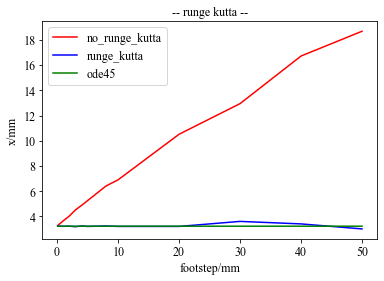

In [8]:
# 绘制图象对比
Plot2.plot_xy_array(footsteps/MM,xs_no_runge_kutta,describe='r-')
Plot2.plot_xy_array(footsteps/MM,xs_runge_kutta,describe='b-')
Plot2.plot_xy_array(footsteps/MM,xs_ode,describe='g-')

Plot2.legend('no_runge_kutta','runge_kutta','ode45',font_size=12)
Plot2.info('footstep/mm','x/mm','-- runge kutta --',font_size=12)

### runge_kutta 法步长和计算结果详细比较，其中蓝线是用 ODE45 计算的准确值

可见控制 0.1mm 误差范围内，步长可以改成 10mm，这样计算速度比不同算法高 2.5倍，精度也高很多。

<img src="./img/B01rungekutta法_footstep_result比较_蓝线准确值.jpg" width=70%><img>

### 2.1 粒子结果对比

比对方法：和 opera 比对，opera 导出的磁场，python 读入，并进行粒子跟踪，和 opera 自带的粒子跟踪对比

opera 单粒子跟踪配置

一开始 opera 中，粒子跟踪的加速电压不会填写，查看了 opera 的 Q&A 中的问题

<img src="./img/B02opera磁场对比04.jpg" width=60%></img>

加速电压，在数值上就等于以 eV 表示的动能

<img src="./img/B02opera磁场对比01.jpg" width=60%></img>

<img src="./img/B02opera磁场对比02.jpg" width=60%></img>

<img src="./img/B02opera磁场对比03.jpg" width=60%></img>



#### 3. CCT Modelling and Calculation

(1) 使用的双极点坐标系？

(2) CCT结果比对 （e.g.同陈鹤鸣结果比对）

(3) CCT多极场调节、优化等

### 4 重要功能, 已写入框架，待实现

e.g. Multipole fields along beam axis

### 5. 其他功能集成，例如 

(1) Cosy脚本中不同enengy offset多粒子跟踪生成

SR  0.000000e+00  0.000000e+00  3.500000e-03  0.000000e+00  0  DE  0  0  1 ;

SR  0.000000e+00  0.000000e+00  3.460906e-03  1.117842e-03  0  DE  0  0  1 ;

SR  0.000000e+00  0.000000e+00  3.342445e-03  2.224922e-03  0  DE  0  0  1 ;

SR  0.000000e+00  0.000000e+00  3.137554e-03  3.323676e-03  0  DE  0  0  1 ;

SR  0.000000e+00  0.000000e+00  2.834815e-03  4.398772e-03  0  DE  0  0  1 ;

### 6. 关于CUDA并行化实现？是在什么级别？计算每个粒子还是每套参数？